# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [158]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image
import re
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import r2_score
mpl.style.use('ggplot')
%matplotlib inline

## Load the data into a DataFrame
df = pd.read_csv('./../Iowa_Liquor_sales_sample_10pct.csv')
df.describe()

## Transform the dates if needed, e.g.
df['Date'] = pd.to_datetime(df['Date'],format="%m/%d/%Y")
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


#Update $$$ to floats
df['Sale (Dollars)'] = [float(x.replace('$','')) for x in df['Sale (Dollars)']]
df['State Bottle Cost'] = [float(x.replace('$','')) for x in df['State Bottle Cost']]
df['State Bottle Retail'] = [float(x.replace('$','')) for x in df['State Bottle Retail']]

#Make things proper case (all caps = yuck)
df['Category Name'] = df['Category Name'].astype(str)
df['Category Name'] = [x.title() for x in df['Category Name']]
df['City'] = df['City'].astype(str)
df['City'] = [x.title() for x in df['City']]

df.info()
df.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 20 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270955 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null float64
State Bottle Retail      270955 non-null float64
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null float64
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
Year           

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
0,2015-11-04,3717,Sumner,50674,9.0,Bremer,1051100.0,Apricot Brandies,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,2015,11
1,2016-03-02,2614,Davenport,52807,82.0,Scott,1011100.0,Blended Whiskies,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,2016,3
2,2016-02-11,2106,Cedar Falls,50613,7.0,Black Hawk,1011200.0,Straight Bourbon Whiskies,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,2016,2
3,2016-02-03,2501,Ames,50010,85.0,Story,1071100.0,American Cocktails,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,2016,2
4,2015-08-18,3654,Belmond,50421,99.0,Wright,1031080.0,Vodka 80 Proof,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,2015,8


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

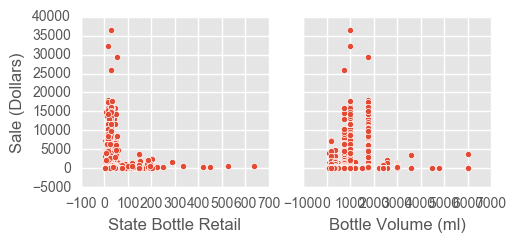

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830,2015.193246,5.821103
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182,0.394845,3.621291
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,2015.000000,1.000000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000,2015.000000,3.000000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000,2015.000000,5.000000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,2015.000000,9.000000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,2016.000000,12.000000


In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data=df,x_vars=['State Bottle Retail','Bottle Volume (ml)'],y_vars=['Sale (Dollars)'])
plt.show()
df.describe()


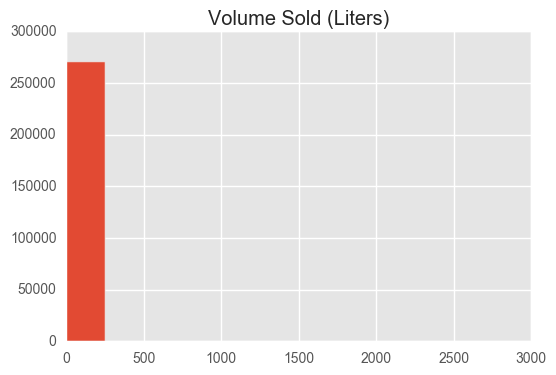

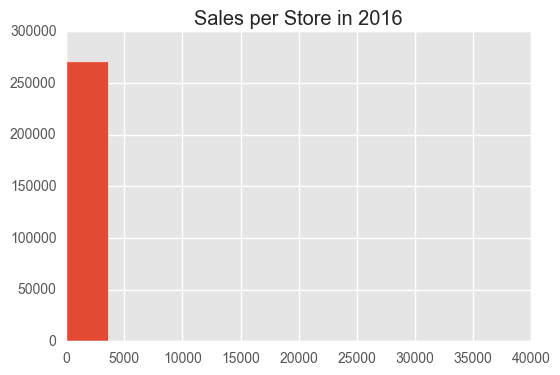

In [52]:
#Histograms

plt.hist(df['Volume Sold (Liters)'])
plt.title('Volume Sold (Liters)')
plt.show()

plt.hist(df['Sale (Dollars)'])
plt.title('Sales per Store in 2016')
plt.show()


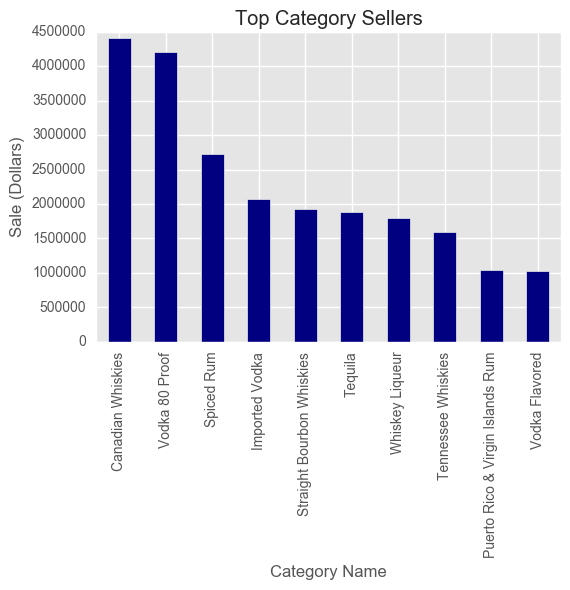

In [40]:
#Top 10 Sellers By Category
top_cat = df.groupby('Category Name')['Sale (Dollars)'].sum().sort_values(ascending = False)[0:10]
top_cat.plot(kind='bar',title = 'Top Category Sellers',colormap='jet').set_ylabel("Sale (Dollars)")
plt.show()

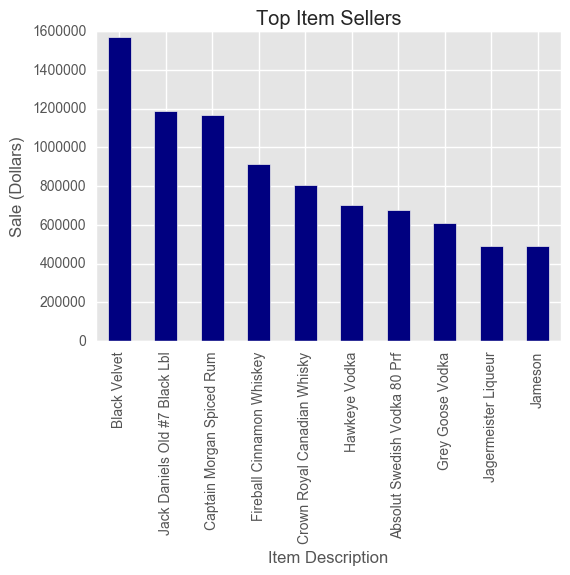

In [41]:
#Top Sellers By Item Name
top_items = df.groupby('Item Description')['Sale (Dollars)'].sum().sort_values(ascending = False)[0:10]
top_items.plot(kind='bar',title = 'Top Item Sellers',colormap='jet').set_ylabel("Sale (Dollars)")
plt.show()

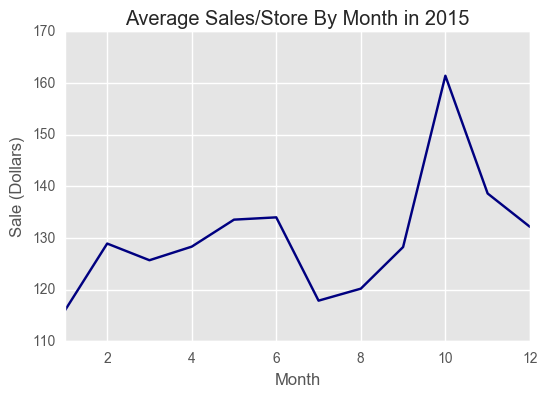

In [196]:
#Average Sales by Month in 2015
top_cat = df[df.Year==2015].groupby('Month')['Sale (Dollars)'].mean()
top_cat.plot(kind='line',title = 'Average Sales/Store By Month in 2015',colormap='jet').set_ylabel("Sale (Dollars)")
plt.show()

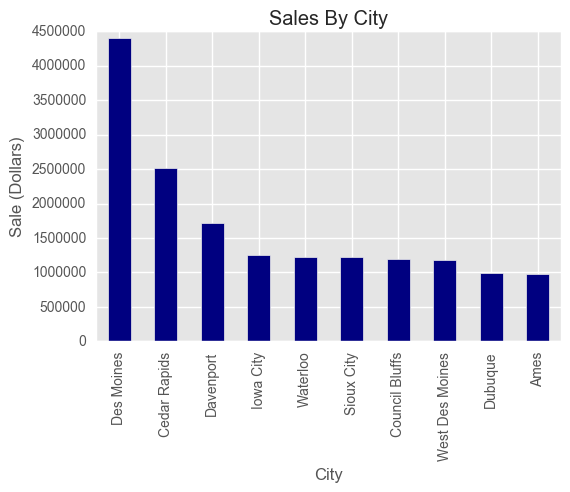

In [92]:
#Top selling cities in 2015 + 2016

top_city = df.groupby('City')['Sale (Dollars)'].sum().sort_values(ascending = False)[0:10]
top_city.plot(kind='bar',title = 'Sales By City',colormap='jet').set_ylabel("Sale (Dollars)")

plt.show()


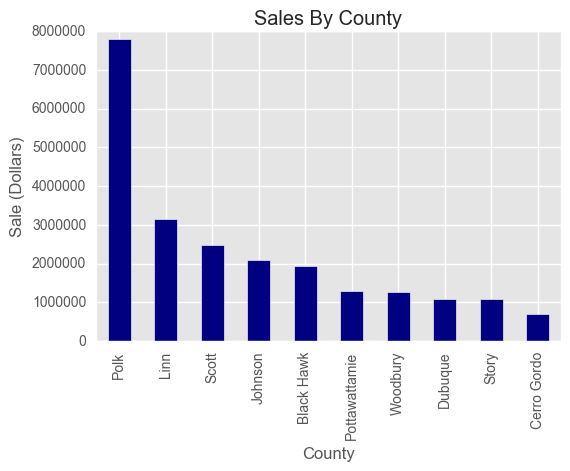

County
Polk             7.785358e+06
Linn             3.150429e+06
Scott            2.468723e+06
Johnson          2.091306e+06
Black Hawk       1.936792e+06
Pottawattamie    1.280695e+06
Woodbury         1.253160e+06
Dubuque          1.082556e+06
Story            1.075273e+06
Cerro Gordo      6.960987e+05
Name: Sale (Dollars), dtype: float64

In [200]:
#Top selling counties in 2015 + 2016

top_city = df.groupby('County')['Sale (Dollars)'].sum().sort_values(ascending = False)[0:10]
top_city.plot(kind='bar',title = 'Top 10 Sales By County',colormap='jet').set_ylabel("Sale (Dollars)")

plt.show()
top_city

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

1) The top selling category is Canadian Whiskies and top selling item is Black Velvet.
2) Average store sales typically rise over the course of the year month over month and peak in October.
3) Pold County is by far and away the top selling county.
4) The average price of a bottle sold is $14 with 75% of sales come from bottles priced below $17.
5) The sales $$$ and volume data is skewed to the right heavily so there must be large positive outliers.


# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [165]:
#New DF with just 2015 Jan-March Data:

#2015 FY Sales Data (Sum)
FY_2015_Sales = pd.pivot_table(df[df.Year == 2015],index = ['Store Number'], values = ['Sale (Dollars)'], aggfunc = sum)
FY_2015_Sales.columns.values[0] = 'FY_2015_Sales'

#2015 Q1 Sales Data (Sum)
Q1_2015_Sales = pd.pivot_table(df[(df.Year == 2015) & (df.Month <= 3)],index = ['Store Number'], values = ['Sale (Dollars)'], aggfunc = sum)
Q1_2015_Sales.columns.values[0] = 'Q1_2015_Sales'

#2015 Q1 Input Data (Average)
Q1_2015_Input = pd.pivot_table(df[(df.Year == 2015) & (df.Month <= 3)], values=['Bottle Volume (ml)', 'Volume Sold (Liters)','State Bottle Retail','Bottles Sold'],index=['Store Number'],aggfunc = 'mean', dropna=True)

#Adding in 2015 Q1 Sum Sales Data to 2015 Q1 Input Data
a = pd.concat([Q1_2015_Sales,Q1_2015_Input], axis = 1).dropna()
#a = pd.merge(Q1_2015_Sales,Q1_2015_Input, how='inner', on=df['Store Number'])

#Adding in 2015 FY Sales Data to Q1 Data
df_2015 = pd.concat([a,FY_2015_Sales], axis = 1).dropna()

df_2015.head()

,Q1_2015_Sales,Bottle Volume (ml),Bottles Sold,State Bottle Retail,Volume Sold (Liters),FY_2015_Sales
Store Number,,,,,,
2106,39287.29,886.434109,20.968992,15.075271,19.582171,146326.22
2113,2833.25,854.166667,4.666667,15.821190,4.216905,9310.22
2130,24272.57,955.747126,17.620690,15.401379,16.635057,111871.43
2152,2003.46,1093.750000,4.812500,14.460938,4.741875,7721.08
2178,5856.41,985.937500,10.208333,14.748542,8.537708,24324.18


In [166]:
#New DF with just 2016 Jan-March Data:

#2016 Q1 Sales Data (Sum)
Q1_2016_Sales = pd.pivot_table(df[(df.Year == 2016) & (df.Month <= 3)],index = ['Store Number'], values = ['Sale (Dollars)'], aggfunc = sum)
Q1_2016_Sales.columns.values[0] = 'Q1_2016_Sales'

#2016 Q1 Input Data (Average)
Q1_2016_Input = pd.pivot_table(df[(df.Year == 2016) & (df.Month <= 3)], values=['Bottle Volume (ml)', 'Volume Sold (Liters)','State Bottle Retail','Bottles Sold'],index=['Store Number'],aggfunc = 'mean', dropna=True)

#Adding in 2016 Q1 Sum Sales Data to 2015 Q1 Input Data
df_2016 = pd.concat([Q1_2016_Sales,Q1_2016_Input], axis = 1).dropna()
#a = pd.merge(Q1_2016_Sales,Q1_2015_Input, how='inner', on=df['Store Number'])

df_2016.head()



,Q1_2016_Sales,Bottle Volume (ml),Bottles Sold,State Bottle Retail,Volume Sold (Liters)
Store Number,,,,,
2106,30523.75,935.039370,17.480315,15.614567,16.675197
2113,2065.90,986.486486,4.297297,16.077297,4.783784
2130,27856.11,955.769231,14.752137,15.932308,13.306838
2152,1376.43,1066.666667,4.533333,12.711667,4.671000
2178,5588.50,1054.741379,8.275862,13.915345,8.979310


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

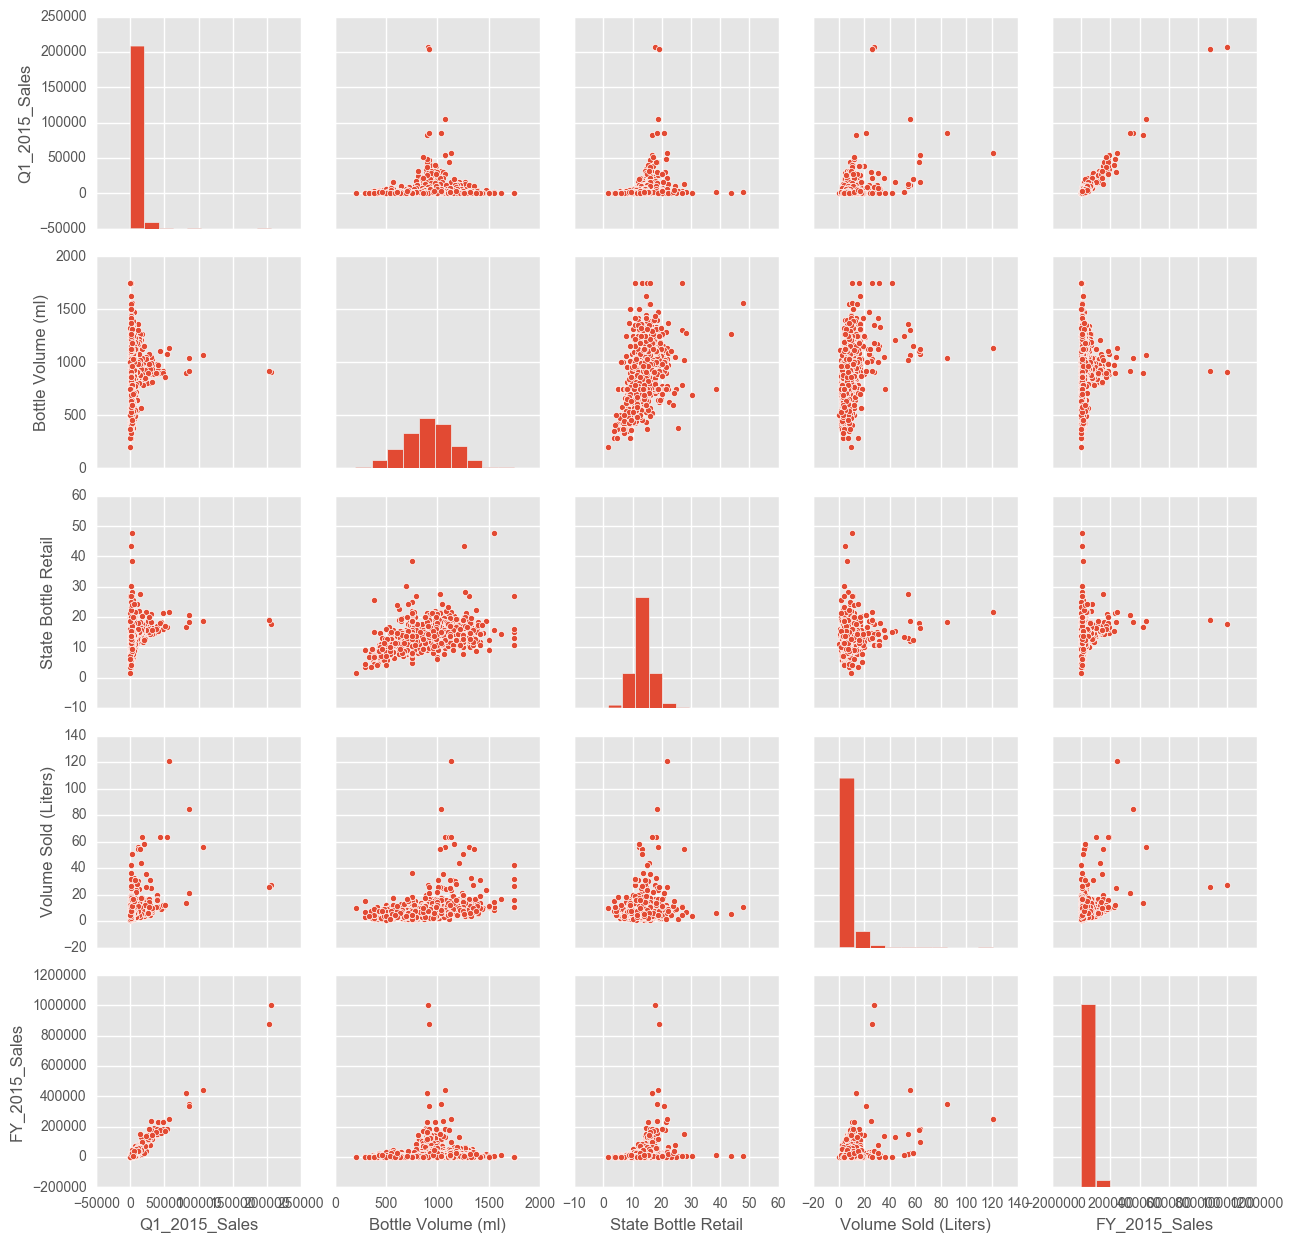

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),Year,Month
count,270955.000000,269878.000000,2.708870e+05,270955.00000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000,270955.000000
mean,3590.263701,57.231642,1.043888e+06,256.43443,45974.963300,924.830341,9.773281,14.675760,9.871285,128.902375,8.981351,2.372830,2015.193246,5.821103
std,947.662050,27.341205,5.018211e+04,141.01489,52757.043086,493.088489,7.047119,10.570145,24.040912,383.027369,28.913690,7.638182,0.394845,3.621291
min,2106.000000,1.000000,1.011100e+06,10.00000,168.000000,50.000000,0.890000,1.340000,1.000000,1.340000,0.100000,0.030000,2015.000000,1.000000
25%,2604.000000,NaN,NaN,115.00000,26827.000000,750.000000,5.500000,8.270000,2.000000,30.450000,1.500000,0.400000,2015.000000,3.000000
50%,3722.000000,NaN,NaN,260.00000,38176.000000,750.000000,8.000000,12.270000,6.000000,70.560000,5.250000,1.390000,2015.000000,5.000000
75%,4378.000000,NaN,NaN,380.00000,64573.000000,1000.000000,11.920000,17.880000,12.000000,135.000000,10.500000,2.770000,2015.000000,9.000000
max,9023.000000,99.000000,1.701100e+06,978.00000,995507.000000,6000.000000,425.000000,637.500000,2508.000000,36392.400000,2508.000000,662.540000,2016.000000,12.000000


In [151]:
sns.pairplot(df_2015)
plt.show()
df.describe()

19995.27


# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [192]:
from sklearn import linear_model

#Build models of total sales based on location, price per bottle, total bottles sold. 
#You may find it useful to build models for each county, zip code, or city.


#Model: Inputs
X = df_2015[['Q1_2015_Sales','Bottles Sold','State Bottle Retail','Volume Sold (Liters)']]
#Model: Outputs
y = df_2015['FY_2015_Sales']

#Model Creation
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
accuracy = model.score(X,y)
print "R^2: ", accuracy

#Test: Inputs
X_test = df_2016[['Q1_2016_Sales','Bottles Sold','State Bottle Retail','Volume Sold (Liters)']]
#Test: Outputs
y_test = df_2016['Q1_2016_Sales']

#Prediction: 2016 FY Sales
Prediction_2016_FY_Sales = model.predict(X_test)
print sum(Prediction_2016_FY_Sales)

R^2:  0.963877990702
29058201.0951


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

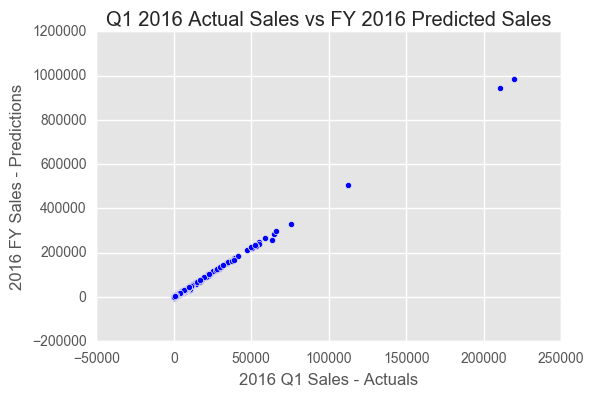

In [180]:
# Q1 2016 Actual Sales vs FY 2016 Predicted Sales
plt.scatter(y_test,Prediction_2016_FY_Sales)

plt.title('Q1 2016 Actual Sales vs FY 2016 Predicted Sales')
plt.xlabel('2016 Q1 Sales - Actuals')
plt.ylabel('2016 FY Sales - Predictions')
plt.show()

# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [201]:
#2016 Actual and Predicted Sales Per Month
print "Problem Statement/Question: How much we will sell for the rest of 2016?"
print "Answer: ", sum(Prediction_2016_FY_Sales)
print "YoY %: ", (sum(Prediction_2016_FY_Sales) - sum(df_2015.FY_2015_Sales)) / sum(df_2015.FY_2015_Sales)
print "2015 FY Sales: ", sum(df_2015.FY_2015_Sales)

Problem Statement/Question: How much we will sell for the rest of 2016?
Answer:  29058201.0951
YoY %:  0.0427271144739
2015 FY Sales:  27867503.1
We are 96% Accurate


In [202]:
print "Blog Link: http://mattbrownblog.tumblr.com/post/152294229774/learning-to-code-part-2-predicting-things"

Blog Link: http://mattbrownblog.tumblr.com/post/152294229774/learning-to-code-part-2-predicting-things
